# Analysis of electrorotation of cells #

## Ideas from viewing in ImageJ ##

* Cells rotate, background is relatively steady
* Cells have high contrast
* Cells are fairly round, but sufficient deviation from a circle to observe rotation
* Cells translate a little
* Some out of focus, low contrast dirt moves
* Some intensity changes of entire image

Idea: Isolate cells and use some technique to measure rotation frequency
* Digital image correlation using only rotation
* Register intensity in one small region at the edge of cell

ImageJ: 
* Image > Stack > Plot orthogonal view: shows periodic intensity variation that can be used. Not entirely vertical/horizontal => there is some motion of the cell that has to be taken into account.
* Image > Stack > Z project > Std: simplest thresholding to pick out rotating spheres
* Image > Adjust > Threshold: Picks all cells plus some background

Idea: Try picking small areas (how large? 5x5? 7x7?) in the middle of the regions that have the highest std. Register the autocorrelation function

$A(\tau)=\int_{-\infty}^\infty I(t+\tau)I(t)dt$


In [45]:
import matplotlib.pyplot as plt  # plotting
import numpy as np  # numerics
from natsort import natsorted, ns
from skimage import io
#import skimage.io
import skimage.color
import skimage.morphology
import skimage.measure as sm

# Load multiple images. Example taken from https://scikit-image.org/docs/dev/user_guide/getting_started.html
import os



plt.rcParams['figure.figsize'] = [20,20]

# list_files = os.listdir('./400khz/')
#list_files = natsorted(list_files)
# print(len(list_files))

folder_path = './400khz/'
list_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)]
list_files = natsorted(list_files)
image_list = []
# Filename fc2_save_2023-03-22-182010-0NNN.tif
for filename in list_files:
    image_list.append(io.imread(filename))
    
# print(image_list[0].shape)

19


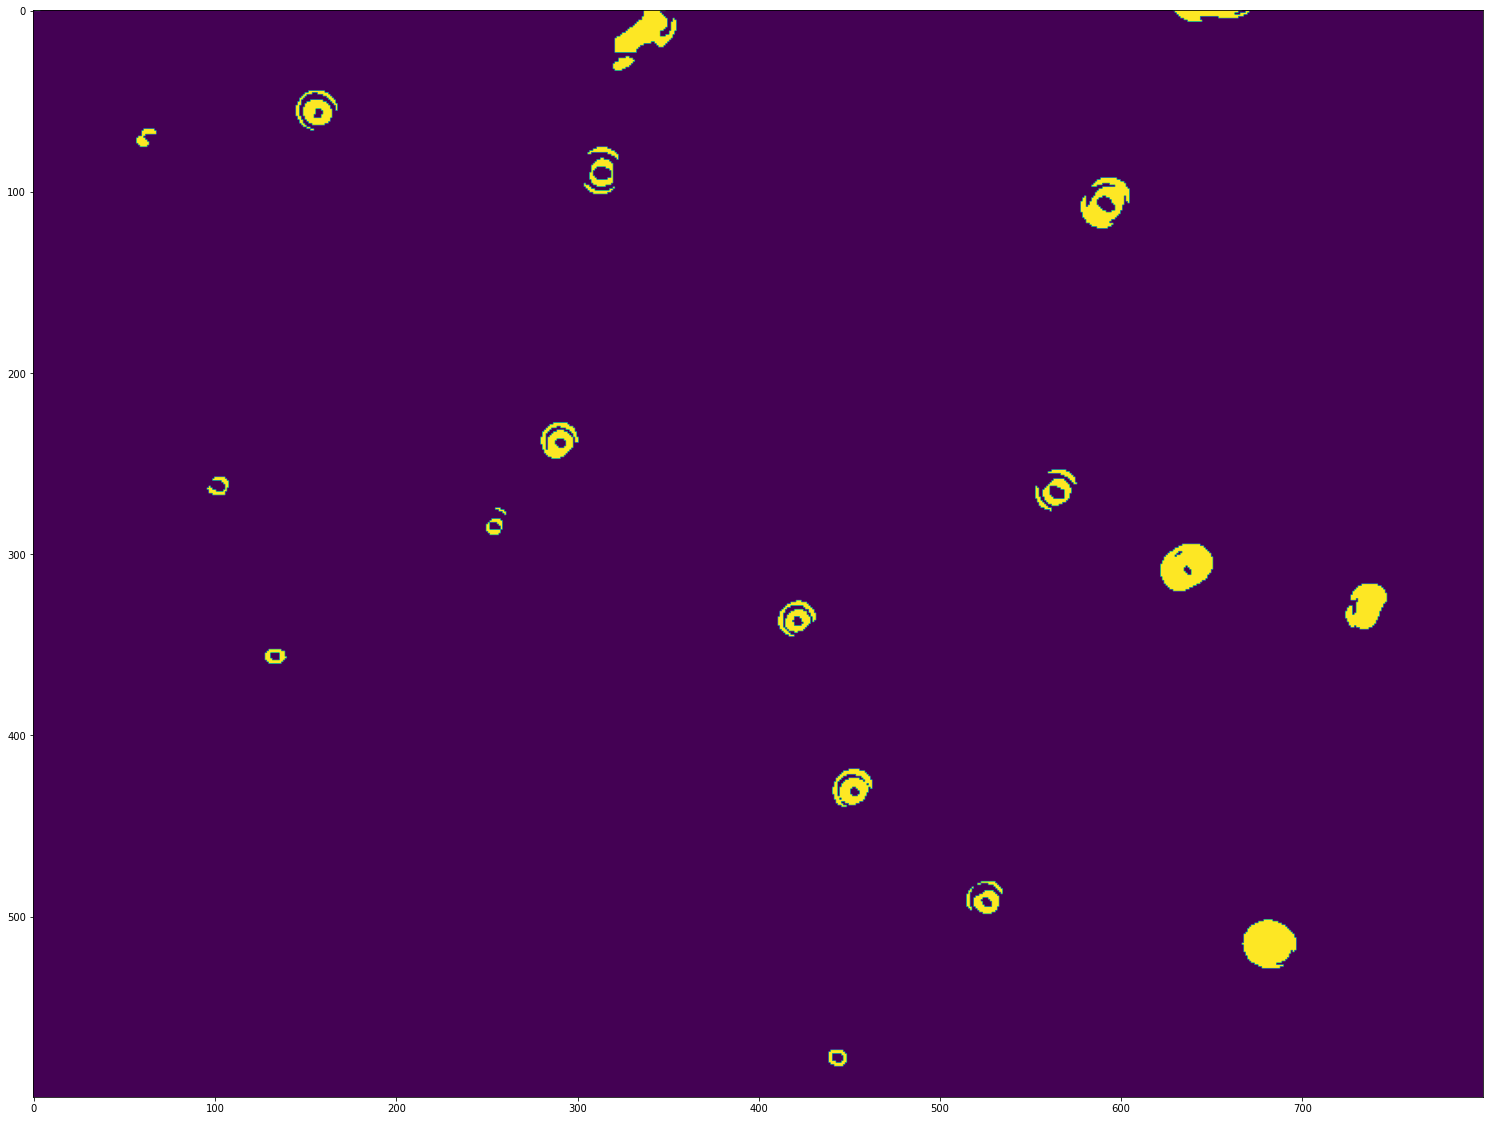

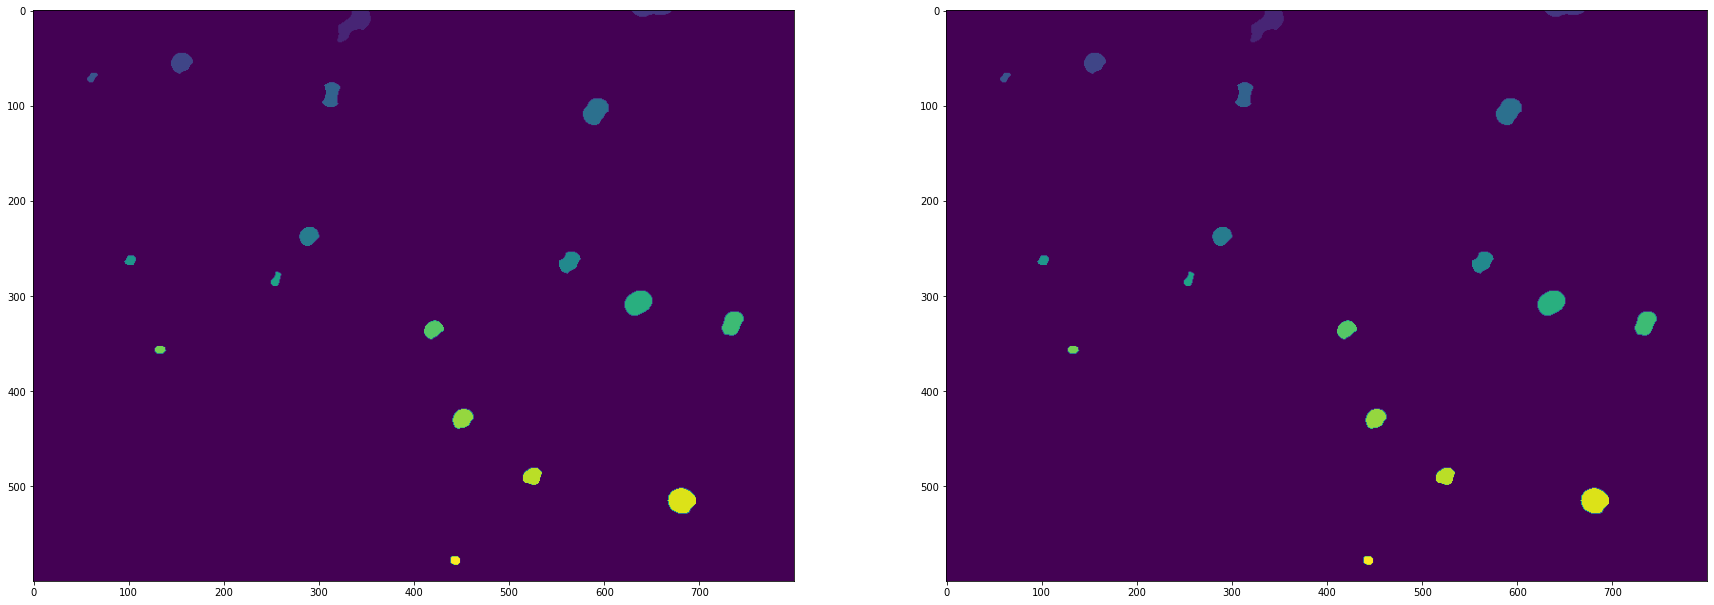

In [64]:
# plt.imshow(image_list[0])#print name of the files in image_list 
# print(list_files[3])
from skimage.measure import label,regionprops

#print out shape of image list 
average = np.mean(image_list, axis=0)

std_image = np.std(image_list, axis = 0)
std_image = std_image > 20
plt.imshow(std_image)
std_image_closing = skimage.morphology.closing(std_image, skimage.morphology.disk(10))
#label connected regions using skimage morphology

std_image_label = skimage.measure.label(std_image_closing)
std_image_label_morphology = skimage.morphology.label(std_image_closing, connectivity=2, background=0)

rps = regionprops(std_image_label)
print(len(rps))

plt.rcParams['figure.figsize'] = [30,20]

fig, ax = plt.subplots(1,2)
ax[0].imshow(std_image_label)
ax[1].imshow(std_image_label_morphology)



#plot both std_image and std_image_closing 
# fig, ax = plt.subplots(1,2)
# ax[0].imshow(std_image)
# ax[1].imshow(std_image_closing)


#perform autocorrelation on boxes that are at the edge of your cells for many different boxes and see which one has the highest correlation